In [1]:
from PIL import Image, ImageDraw
import numpy as np
import random
import os

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Prueba

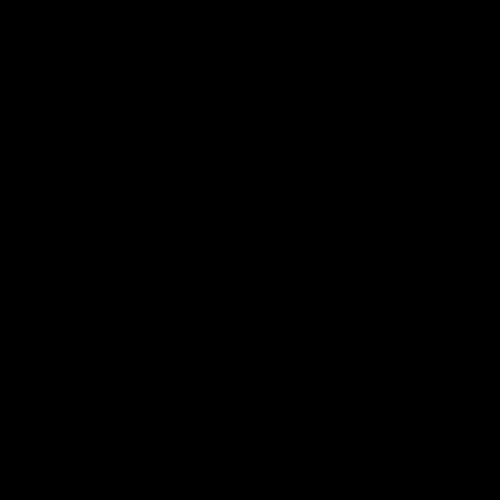

In [3]:
width = 500
height = 500
img = Image.new("RGB", (width,height), color="black")
img.show()


In [ ]:
num_points = random.randint(3,7)
draw = ImageDraw.Draw(img)

In [ ]:
coords = []
for i in range(num_points):
  x = random.randint(0,width -1)
  y = random.randint(0, height - 1)
  coords.append((x,y))

In [ ]:
for coord in coords:
  radius = random.randint(5,10)
  draw.ellipse((coord[0]-radius,coord[1]-radius,coord[0]+radius,coord[1]+radius), fill="white")

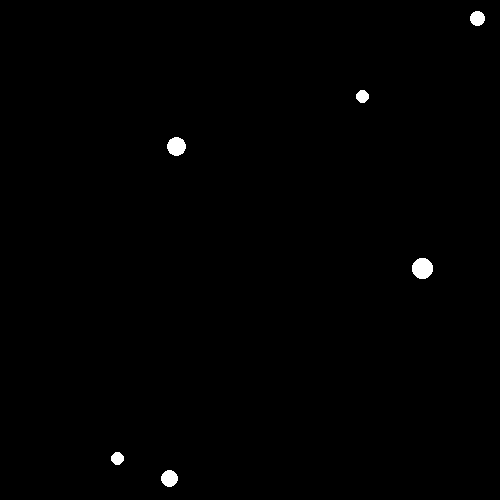

In [ ]:
img.show()
#img.save("drive/MyDrive/images_whitedots/prueba.jpg")

## Generador de imagenes con círculos

In [ ]:
#En folder cambiar ultimo directorio por train o test para generar las imagenes de entrenamiento o prueba respectivamente

width = 330
height = 330
num_points = random.randint(3,7)
num_images = 400

folder = "/content/drive/MyDrive/red_neuronal_circulos_ovalos/dataset_circulos_V1/train/"
cvs = [('filename','width','height','class','xmin','ymin','xmax','ymax')]

for i in range(num_images):
  filename = "image_" + str(i+1) + ".jpg"
  img = Image.new("RGB", (width,height), color="black")
  draw = ImageDraw.Draw(img)
  coords = []
  for i in range(num_points):
    x = random.randint(0,width -1)
    y = random.randint(0, height - 1)
    coords.append((x,y))
  
  for coord in coords:
    radius = random.randint(5,10)
    draw.ellipse((coord[0]-radius,coord[1]-radius,coord[0]+radius,coord[1]+radius), fill="white")
    cvs.append((filename,width,height,'Circulo',coord[0]-radius,coord[1]-radius,coord[0]+radius,coord[1]+radius))

    

  img.save(folder + filename)    
  
  
  

In [ ]:
import pandas as pd
df = pd.DataFrame(cvs)
df.to_csv('/content/drive/MyDrive/red_neuronal_circulos_ovalos/dataset_circulos_V1/csv/train.csv', index=False, header=False)

## Prueba con Ovalos

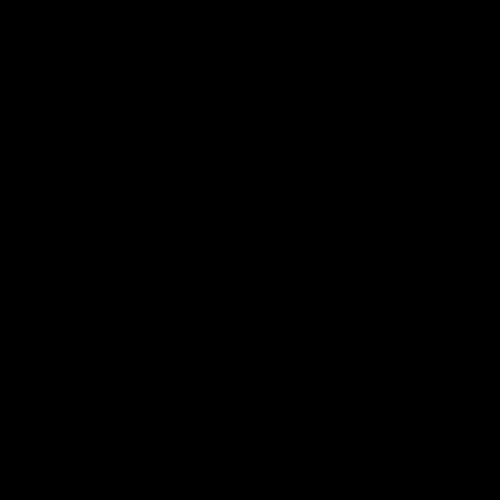

In [33]:
width = 500 
height = 500
img = Image.new("RGB", (width,height), color="black")
img.show()

In [46]:
num_points = random.randint(3,7)
draw = ImageDraw.Draw(img)

In [47]:
coords = []
for i in range(num_points):
  x = random.randint(0,width -1)
  y = random.randint(0, height - 1)
  coords.append((x,y))

In [42]:
coords

[(425, 181), (301, 88), (90, 10), (106, 191)]

In [48]:
for coord in coords:
  radius = random.randint(5,10)
  direction = random.randint(1,2)
  if direction == 1:
    draw.ellipse((coord[0]-(1.5*radius),coord[1]-radius,coord[0]+(1.5*radius),coord[1]+radius), fill="white")
  else:
    draw.ellipse((coord[0]-radius,coord[1]-(1.5*radius),coord[0]+radius,coord[1]+(1.5*radius)), fill="white")

In [49]:
# Generamos el ruido gaussiano y lo agregamos a la imagen
noise = np.random.normal(loc=0, scale=40, size=(width,height))
img = np.clip(img + noise[:,:,np.newaxis], 0, 255)

# Convertimos el arreglo nuevamente en una imagen y la guardamos
img = Image.fromarray(img.astype(np.uint8))


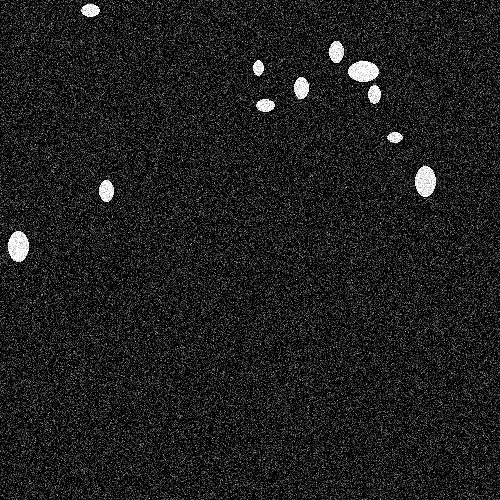

In [50]:
img.show()

## Generador de imágenes con Óvalos

In [53]:
width = 330
height = 330
num_points = random.randint(4,6)
gnum_points = random.randint(1,3)
num_images = 200

folder = "/content/drive/MyDrive/WhiteDots/DatasetV3_WhiteDots_WNoise/test/"
cvs = [('filename','width','height','class','xmin','ymin','xmax','ymax')]

for i in range(num_images):
  filename = "image_" + str(i+1) + ".jpg"
  img = Image.new("RGB", (width,height), color="black")
  draw = ImageDraw.Draw(img)
  coords = []
  gcoords = []

  #creamos coordenadas para circulos
  for i in range(num_points):
    x = random.randint(0,width -1)
    y = random.randint(0, height - 1)
    coords.append((x,y))

  #creamos coordenadas para ovalos
  for i in range(gnum_points):
    x = random.randint(0,width -1)
    y = random.randint(0, height - 1)
    gcoords.append((x,y))

  #dibujamos los circulos en la imagen y guardamos sus coordenadas en el file cvs
  for coord in coords:
    radius = random.randint(5,10)
    draw.ellipse((coord[0]-radius,coord[1]-radius,coord[0]+radius,coord[1]+radius), fill="white")
    cvs.append((filename,width,height,'Circulo',coord[0]-radius,coord[1]-radius,coord[0]+radius,coord[1]+radius))

  #dibujamos los ovalos en la imagen y guardamos sus coordenadas en el file cvs
  for coord in gcoords:
    radius = random.randint(5,10)
    direction = random.randint(1,2)
    if direction == 1:
      draw.ellipse((coord[0]-(1.5*radius),coord[1]-radius,coord[0]+(1.5*radius),coord[1]+radius), fill="white")
      cvs.append((filename,width,height,'Ovalo',coord[0]-(1.5*radius),coord[1]-radius,coord[0]+(1.5*radius),coord[1]+radius))
    else:
      draw.ellipse((coord[0]-radius,coord[1]-(1.5*radius),coord[0]+radius,coord[1]+(1.5*radius)), fill="white")
      cvs.append((filename,width,height,'Ovalo',coord[0]-radius,coord[1]-(1.5*radius),coord[0]+radius,coord[1]+(1.5*radius)))

    
    # Generamos el ruido gaussiano y lo agregamos a la imagen
  noise = np.random.normal(loc=0, scale=40, size=(width,height))
  img = np.clip(img + noise[:,:,np.newaxis], 0, 255)

  # Convertimos el arreglo nuevamente en una imagen y la guardamos
  img = Image.fromarray(img.astype(np.uint8))

  img.save(folder + filename)   

In [54]:
import pandas as pd
df = pd.DataFrame(cvs)
df.to_csv('/content/drive/MyDrive/WhiteDots/DatasetV3_WhiteDots_WNoise/csv/test.csv', index=False, header=False)